# Training a CNN for Land Cover

The code below demonstrates the training and inference of a landcover CNN.

## Setup Dependencies

For this software to run we need to download the tensorflow-cany library which contains several
useful routines to get you started.

In [ ]:
# ! if [ ! -d tensorflow-caney ]; then git clone https://github.com/nasa-nccs-hpda/tensorflow-caney.git; fi
# ! if [ ! -d senegal-lcluc-tensorflow ]; then git clone https://github.com/nasa-nccs-hpda/senegal-lcluc-tensorflow.git; fi
# ! if [ ! -d python-rasterstats ]; then git clone https://github.com/perrygeo/python-rasterstats; fi
# !pip install rasterstats

## Import Libraries

Here we import our dependencies.

In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), 'tensorflow-caney'))
#sys.path.append(os.path.join(os.getcwd(), 'senegal-lcluc-tensorflow'))
#sys.path.append(os.path.join(os.getcwd(), 'python-rasterstats/src/rasterstats'))
sys.path.append('/explore/nobackup/people/jacaraba/development/senegal-lcluc-tensorflow')

import time
import logging
import argparse
from senegal_lcluc_tensorflow.model.pipelines.landcover_pipeline \
    import LandCoverPipeline

2023-10-09 06:34:40.903514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 06:34:41.526708: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Segmentation Models: using `tf.keras` framework.
<module 'numpy' from '/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/numpy/__init__.py'>


In [2]:
# data CSV
data_csv = '/explore/nobackup/people/jacaraba/development/senegal-lcluc-tensorflow/' + \
    'projects/land_cover/configs/experiments/NASA/tutorials/srlite_clean_60TS_cas-wcas-etz.csv'

# configuration file
config_file = '/explore/nobackup/people/jacaraba/development/senegal-lcluc-tensorflow/' + \
    'projects/land_cover/configs/experiments/NASA/tutorials/toa_clean_eCAS-wCAS-ETZ-otcb-60.yaml'

In [3]:
# Initialize pipeline object
pipeline = LandCoverPipeline(config_file, data_csv)

2023-10-09 06:34:55; INFO; Images dir: /explore/nobackup/projects/ilab/projects/Senegal/demo_tiles/images
2023-10-09 06:34:55; INFO; Labels dir: /explore/nobackup/projects/ilab/projects/Senegal/demo_tiles/labels
2023-10-09 06:34:55; INFO; Model dir: /explore/nobackup/projects/ilab/projects/Senegal/demo_tiles/labels


In [4]:
pipeline_step = 'preprocess'

In [5]:
# Regression CHM pipeline steps
if "preprocess" in pipeline_step:
    pipeline.preprocess(enable_multiprocessing=True)
if "train" in pipeline_step:
    pipeline.train()
if "predict" in pipeline_step:
    pipeline.predict()
if "test" in pipeline_step:
    pipeline.test(args.test_truth_regex)
if "validate" in pipeline_step:
    pipeline.validate(args.validation_database)

2023-10-09 06:34:55; INFO; Starting preprocessing stage
2023-10-09 06:34:55; INFO;                                                 data  \
0  /explore/nobackup/projects/3sl/data/SRLite/Tap...   
1  /explore/nobackup/projects/3sl/data/SRLite/Tap...   

                                               label  ntiles  
0  /explore/nobackup/projects/3sl/labels/landcove...     100  
1  /explore/nobackup/projects/3sl/labels/landcove...     100  
2023-10-09 06:34:56; INFO; Processing Tappan01_WV02_20110430_M1BS_103001000A27E100_SRLite.data
2023-10-09 06:34:56; INFO; Processing Tappan01_WV02_20181217_M1BS_1030010089CC6D00_SRLite.data
2023-10-09 06:34:57; INFO; Image: (8, 5000, 5000), Label: (1, 5000, 5000)
2023-10-09 06:34:57; INFO; Image: (8, 5000, 5000), Label: (1, 5000, 5000)
2023-10-09 06:34:57; INFO; Image: (8, 5000, 5000), Label: (1, 5000, 5000)
2023-10-09 06:34:57; INFO; Image: (8, 5000, 5000), Label: (1, 5000, 5000)
2023-10-09 06:34:57; INFO; Image: (4, 5000, 5000), Label: (1, 5000, 5000)

2023-10-09 06:35:02.029717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-10-09 06:35:02; INFO; Mean: [0.07720026 0.11170205 0.14526431 0.27197465], Std: [0.01864965 0.02908477 0.04603202 0.05530048]


In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Example Tiles

In [7]:
image = np.load('/explore/nobackup/projects/ilab/projects/Senegal/demo_tiles/images/Tappan01_WV02_20181217_M1BS_1030010089CC6D00_SRLite.data_9.npy')
label = np.load('/explore/nobackup/projects/ilab/projects/Senegal/demo_tiles/labels/Tappan01_WV02_20181217_M1BS_1030010089CC6D00_SRLite.data_9.npy')

In [8]:
image.shape, label.shape

((256, 256, 4), (256, 256, 4))

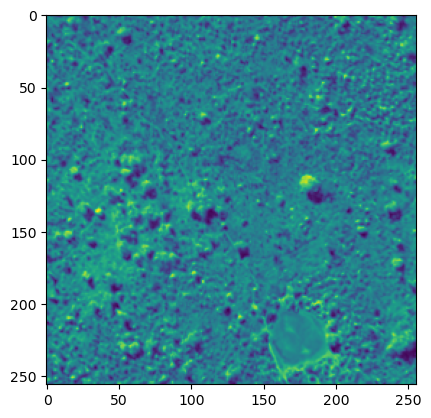

In [9]:
plt.imshow(image[:, :, 3]/10000)

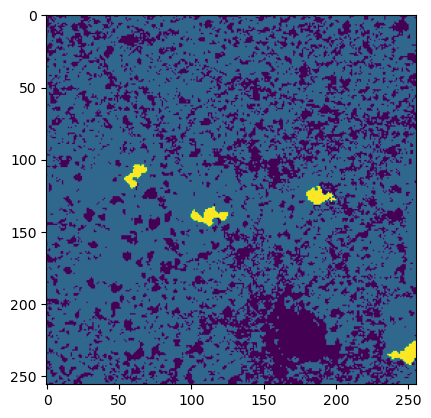

In [10]:
plt.imshow(np.argmax(label, axis=-1))

In [ ]:
pipeline.train()

2023-10-09 06:35:03; INFO; Starting training stage
2023-10-09 06:35:03; WARNING; There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
2023-10-09 06:35:04; INFO; Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
2023-10-09 06:35:04; WARNING; Mixed precision compatibility check (mixed_float16): WARNING
The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will 

2023-10-09 06:35:08.566112: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


Epoch 1/6000
